In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
datos = pd.read_excel('/content/VictimasSE_202309.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
datos.columns = datos.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\W', '', regex=True)

In [ ]:
#militante_político, etnia, fuerza_o_grupo_armado_organizado_al_que_pertenece_el_combatiente, tipo_de_población_vulnerable
#descripción_fuerza_o_grupo_armado_organizado_al_que_pertenece_el_combatiente, circunstancia_muerte_en_cautiverio
# días_de_cautiverio


var = datos.militante_político
print(var.value_counts(),'nulos', var.isna().sum()//var.size)

#Hay demasiados faltantes en : militante_político, etnia, grupo armado al que pertenece, descripción, el tipo de poblacion v,
#muerte cautiverio


#depratamento, calidad_de_la_víctima_o_la_baja, sexo

var1 = datos.departamento
print(var1.value_counts()/var1.size,'nulos', var1.isna().sum()/var1.size, '%',)

#El 20% de los secuestros fueron en Antioquia
##El 96% fueron civiles
#El 79% fueron hombres
#No se tiene info. de la ocupación del 63%
#La situación actual de ND son 56%, seguido por liberado 37% y el tipo de liberación del 79% fue ND
#El 90% fue secuestrado 0 veces, el 8% 1 vez
#65% nulos en edad, y el 19% y 10% Adultos y jovenes

militante_político
LIBERAL                                               174
CONSERVADOR                                           111
OTRO ¿CUÁL?                                            75
PARTIDO DE LA U                                         7
FUERZA ALTERNATIVA REVOLUCIONARIA DEL COMÚN - FARC      6
PARTIDO COMUNISTA                                       3
POLO DEMOCRÁTICO ALTERNATIVO                            2
AD-M19                                                  2
UNIÓN PATRIÓTICA                                        2
ESPERANZA, PAZ Y LIBERTAD                               1
Name: count, dtype: int64 nulos 0
departamento
ANTIOQUIA                                                   0.203892
CESAR                                                       0.075878
NORTE DE SANTANDER                                          0.058143
BOLIVAR                                                     0.048975
NARIÑO                                                      0.047799
SIN INFOR

In [ ]:
victimas = datos.drop({'fuerza_o_grupo_armado_organizado_al_que_pertenece_el_combatiente','circunstancia_muerte_en_cautiverio',
                       'código_dane_de_municipio','militante_político','etnia','tipo_de_población_vulnerable',
                       'descripción_fuerza_o_grupo_armado_organizado_al_que_pertenece_el_combatiente','días_de_cautiverio','id_caso','id_persona','latitud','longitud'
                       },axis=1)

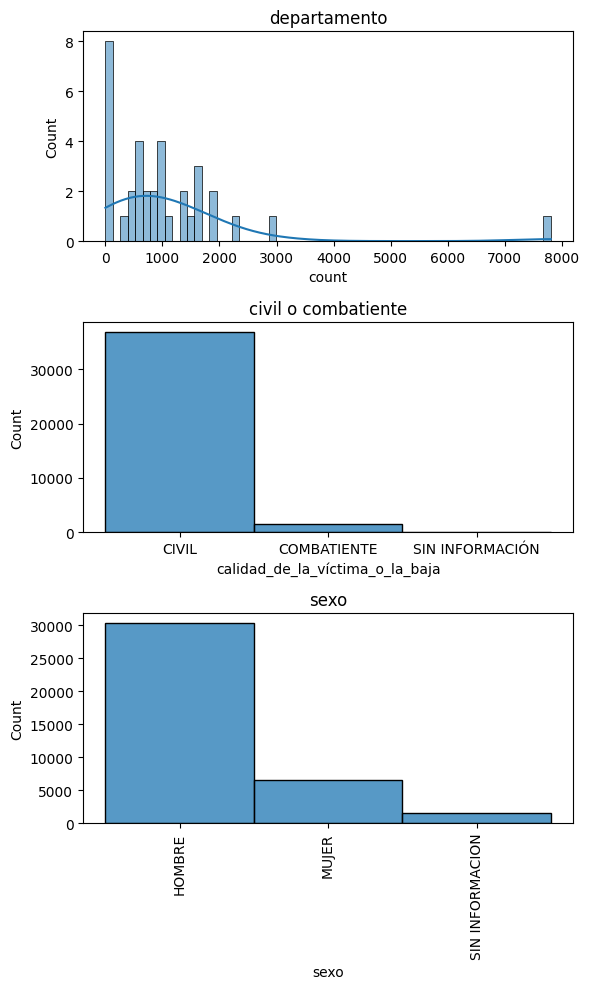

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

sns.histplot(datos.departamento.value_counts().sort_values(ascending=True), bins=60, kde=True, ax=axes[0])
axes[0].set_title('departamento')
plt.xticks(rotation = 'vertical')

sns.histplot(datos.calidad_de_la_víctima_o_la_baja, ax=axes[1])
axes[1].set_title('civil o combatiente')
plt.xticks(rotation = 'vertical')

sns.histplot(datos.sexo, ax=axes[2])
axes[2].set_title('sexo')
plt.xticks(rotation = 'vertical')

plt.tight_layout()
plt.show()

In [ ]:
victimas.head()

,municipio,departamento,año,mes,día,sexo,ocupación,calidad_de_la_víctima_o_la_baja,situación_actual_de_la_víctima,tipo_de_liberación,no_de_veces_secuestrado,edad
0,QUIBDO,CHOCO,2005,8,2,HOMBRE,MINERO,CIVIL,MUERTO EN CAUTIVERIO,NaN,1,ADULTEZ (29-59 AÑOS)
1,ISNOS,HUILA,2014,7,13,HOMBRE,CAMPESINO,CIVIL,MUERTO EN CAUTIVERIO,NaN,1,ADULTEZ (29-59 AÑOS)
2,SAN AGUSTIN,HUILA,2006,12,21,HOMBRE,CONDUCTOR/MOTORISTA,CIVIL,MUERTO EN CAUTIVERIO,PAGO,2,NaN
3,RIOHACHA,LA GUAJIRA,1975,6,19,HOMBRE,FUNCIONARIO PÚBLICO,CIVIL,MUERTO EN CAUTIVERIO,NaN,0,NaN
4,SITIONUEVO,MAGDALENA,2005,9,26,HOMBRE,ECONOMÍA INFORMAL,CIVIL,MUERTO EN CAUTIVERIO,ND,1,NaN


In [ ]:
datoscambiados = victimas.copy()
datoscambiados.departamento = pd.factorize(datoscambiados['departamento'])[0]
datoscambiados.año = pd.factorize(datoscambiados['año'])[0]
datoscambiados.mes = pd.factorize(datoscambiados['mes'])[0]
datoscambiados.sexo = pd.factorize(datoscambiados['sexo'])[0]
datoscambiados.ocupación = pd.factorize(datoscambiados['ocupación'])[0]
datoscambiados.calidad_de_la_víctima_o_la_baja = pd.factorize(datoscambiados['calidad_de_la_víctima_o_la_baja'])[0]
datoscambiados.situación_actual_de_la_víctima = pd.factorize(datoscambiados['situación_actual_de_la_víctima'])[0]
datoscambiados.no_de_veces_secuestrado = pd.factorize(datoscambiados['no_de_veces_secuestrado'])[0]
datoscambiados.edad = pd.factorize(datoscambiados['edad'])[0]
datoscambiados.municipio = pd.factorize(datoscambiados['municipio'])[0]
datoscambiados.tipo_de_liberación = pd.factorize(datoscambiados['tipo_de_liberación'])[0]


In [ ]:
victimas.dtypes
#Preguntas:
#Qué relacion tiene el sexo con los secuestros, ya que hay más hombres que mujeres, qué tienen en común las mujeres que han sido secuestradas?
#En qué año se vieron más casos y qué tenían en común esos casos?
#A qué tipo de persona secuestran más veces?
#Qué tipo de personas secuetraban más en cada departamento?
#En algún mes se secuestra más?

municipio                          object
departamento                       object
año                                 int64
mes                                 int64
día                                 int64
sexo                               object
ocupación                          object
calidad_de_la_víctima_o_la_baja    object
situación_actual_de_la_víctima     object
tipo_de_liberación                 object
no_de_veces_secuestrado             int64
edad                               object
dtype: object

In [ ]:
datoscambiados.corr()

,municipio,departamento,año,mes,día,sexo,ocupación,calidad_de_la_víctima_o_la_baja,situación_actual_de_la_víctima,tipo_de_liberación,no_de_veces_secuestrado,edad
municipio,1.000000,0.157083,-0.052455,-0.045482,0.050950,0.008147,-0.001024,-0.023740,0.053076,-0.008671,0.008373,0.020826
departamento,0.157083,1.000000,0.048295,0.062703,-0.087552,0.012825,0.012006,-0.015842,-0.014520,0.025882,0.011960,0.020878
año,-0.052455,0.048295,1.000000,0.053883,-0.078485,0.059684,0.063445,-0.009168,-0.050406,0.026169,-0.113827,-0.054481
mes,-0.045482,0.062703,0.053883,1.000000,-0.082836,0.005995,-0.009416,-0.067800,-0.054990,0.027444,0.038099,-0.046245
día,0.050950,-0.087552,-0.078485,-0.082836,1.000000,-0.005760,-0.002714,-0.028774,0.033441,-0.005754,0.016165,-0.002502
sexo,0.008147,0.012825,0.059684,0.005995,-0.005760,1.000000,0.066543,0.011444,0.012382,-0.007816,-0.079841,0.022200
ocupación,-0.001024,0.012006,0.063445,-0.009416,-0.002714,0.066543,1.000000,-0.112189,-0.020342,0.030694,0.022644,0.021142
calidad_de_la_víctima_o_la_baja,-0.023740,-0.015842,-0.009168,-0.067800,-0.028774,0.011444,-0.112189,1.000000,-0.044932,-0.011535,-0.237719,-0.053711
situación_actual_de_la_víctima,0.053076,-0.014520,-0.050406,-0.054990,0.033441,0.012382,-0.020342,-0.044932,1.000000,-0.257896,0.156155,0.011491
tipo_de_liberación,-0.008671,0.025882,0.026169,0.027444,-0.005754,-0.007816,0.030694,-0.011535,-0.257896,1.000000,-0.073196,0.001862


In [ ]:
SI#Situación actual de la victima y tipo de liberación
#Tipo de liberación y nro secuestrado
#Municipio y mes
#Municipio y situacion de la vict.
#Depatarament y año
#Departamento y dia
#Dep y tipo de libreacion
#Año con tipo de libearcion y nro secuestrado
#ocupacion con edad y tipo de liberacion
#Calidad de la victima y año
SI#nro secuetrado con situacion actual y tipo de liberacion
#edad con situacion actual
#edad con año
#edad con mes
SI#sexo y año
SI#ocupacion con seño y año
#calidad victima con ocupacion
SI#nro secuestrado con sexo


#Que tipo de secuestro es más popular en mujeres y en hombres

([0, 1, 2, 3, 4],
 [Text(0, 0, 'MUERTO EN CAUTIVERIO'),
  Text(1, 0, 'LIBERADO'),
  Text(2, 0, 'ND'),
  Text(3, 0, 'DESAPARECIDO FORZADO'),
  Text(4, 0, 'CONTINÚA SECUESTRADO')])

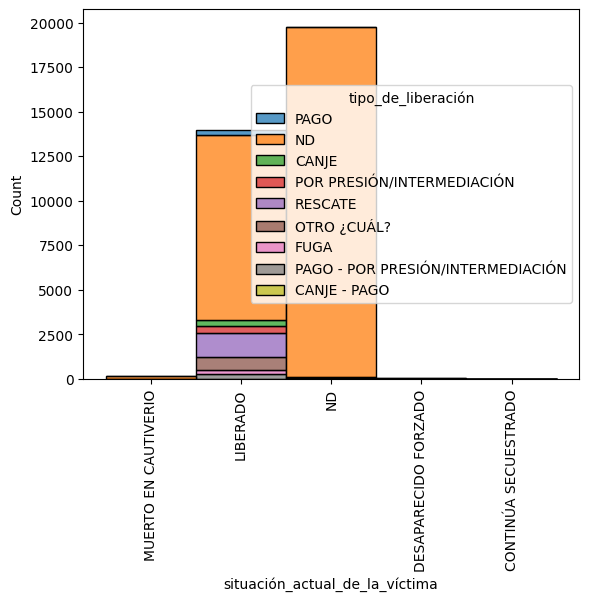

In [ ]:
#Situación actual de la victima y tipo de liberación
sns.histplot(victimas,
             x = victimas.situación_actual_de_la_víctima,
             hue = victimas.tipo_de_liberación,
             multiple = 'stack')
plt.xticks(rotation = 'vertical')




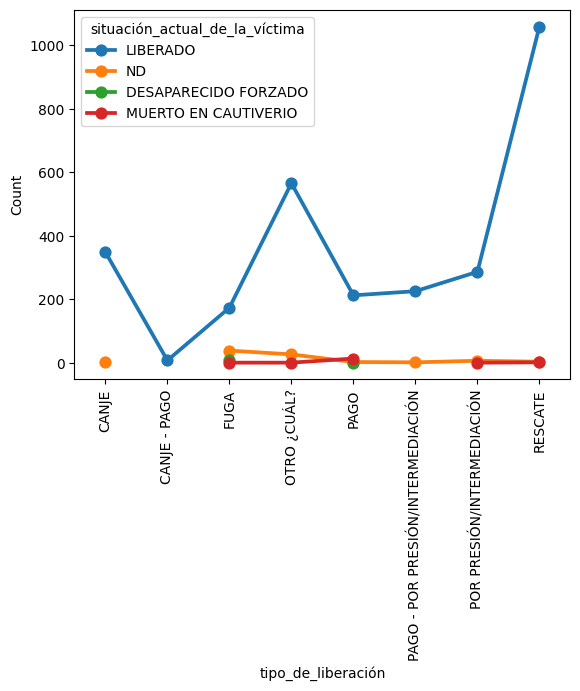

In [ ]:
victimas1 = victimas.copy()
victimas1 = victimas1[victimas1.tipo_de_liberación != 'ND']
victimas1 = victimas1[victimas1.año > 1990]
frequency_data = victimas1.groupby(['tipo_de_liberación','situación_actual_de_la_víctima']).size().reset_index(name='Count')

sns.pointplot(data=frequency_data, x='tipo_de_liberación', y='Count', hue='situación_actual_de_la_víctima')
plt.xticks(rotation = 'vertical')

plt.show()

In [ ]:
#sexo y año
sns.scatterplot(victimas,
             x = victimas.año,
             y = victimas.sexo)


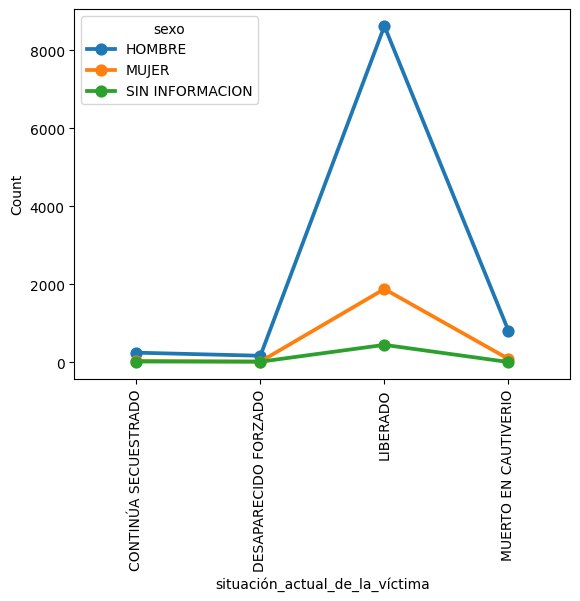

In [ ]:
victimas1 = victimas.copy()
victimas1 = victimas1[victimas1.situación_actual_de_la_víctima != 'ND']
victimas1 = victimas1[victimas1.año > 1990]
frequency_data = victimas1.groupby(['situación_actual_de_la_víctima','sexo']).size().reset_index(name='Count')

sns.pointplot(data=frequency_data, x='situación_actual_de_la_víctima', y='Count', hue='sexo')
plt.xticks(rotation = 'vertical')

plt.show()

In [ ]:
victimas1 = victimas.copy()
victimas1 = victimas1[victimas1.tipo_de_liberación != 'ND']
victimas1 = victimas1[victimas1.año > 1990]

frequency_data = victimas1.groupby(['tipo_de_liberación','sexo']).size().reset_index(name='Count')

sns.pointplot(data=frequency_data, x='tipo_de_liberación', y='Count', hue='sexo')
plt.xticks(rotation = 'vertical')

plt.show()

<Axes: xlabel='no_de_veces_secuestrado', ylabel='Count'>

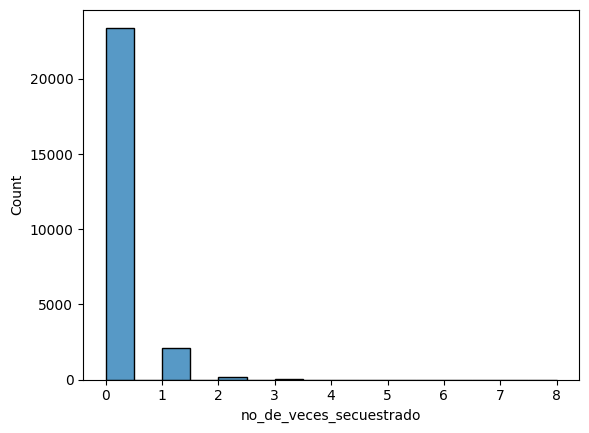

In [ ]:
victimas1 = victimas.copy()
victimas1 = victimas1[victimas1.no_de_veces_secuestrado != 150]
victimas1 = victimas1[victimas1.año > 1990]
victimas1 = victimas1[victimas1.sexo == 'HOMBRE']

sns.histplot(
    victimas1,
    x = victimas1.no_de_veces_secuestrado,
)


In [ ]:
victimas1.no_de_veces_secuestrado.unique()

array([  1,   2,   3,   8, 150,   4])

<Axes: xlabel='no_de_veces_secuestrado', ylabel='Count'>

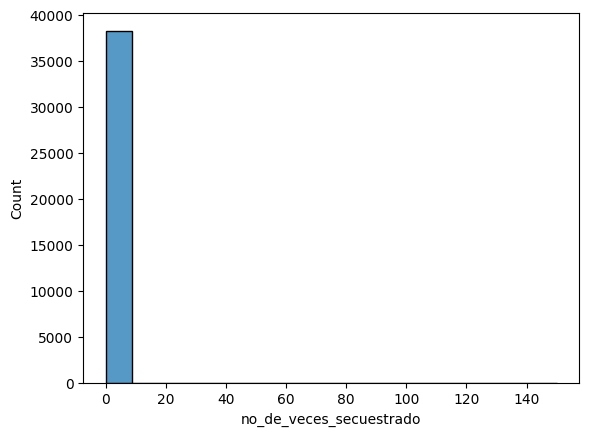

In [ ]:
sns.histplot(
    x = victimas.no_de_veces_secuestrado
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'ADULTEZ (29-59 AÑOS)'),
  Text(1, 0, 'JUVENTUD (18-28 AÑOS)'),
  Text(2, 0, 'ADOLESCENCIA (12-17 AÑOS)'),
  Text(3, 0, 'PRIMERA INFANCIA (0-5 AÑOS)'),
  Text(4, 0, 'PERSONA MAYOR (60 AÑOS O MAS)'),
  Text(5, 0, 'INFANCIA (6-11 AÑOS)')])

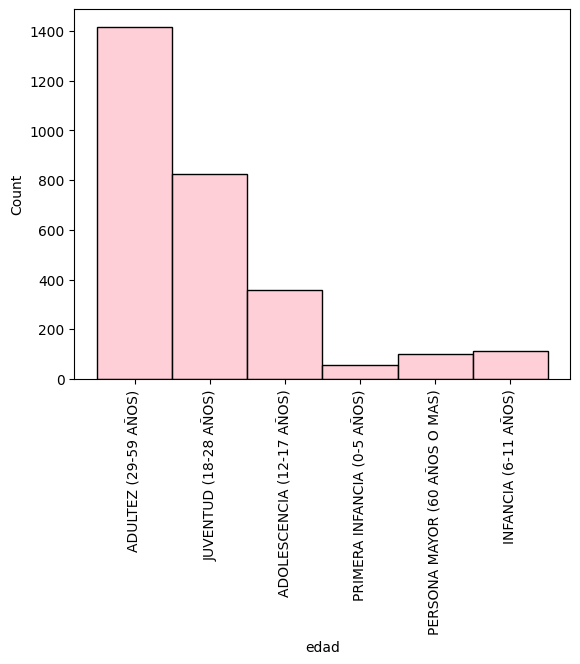

In [ ]:
victimas1 = victimas.copy()
victimas1 = victimas1[victimas1.edad != 'ND']
victimas1 = victimas1[victimas1.año > 1990]
victimas1 = victimas1[victimas1.sexo == 'MUJER']

sns.histplot(
    victimas1,
    x = victimas1.edad,
    color = 'pink'
)
plt.xticks(rotation = 'vertical')


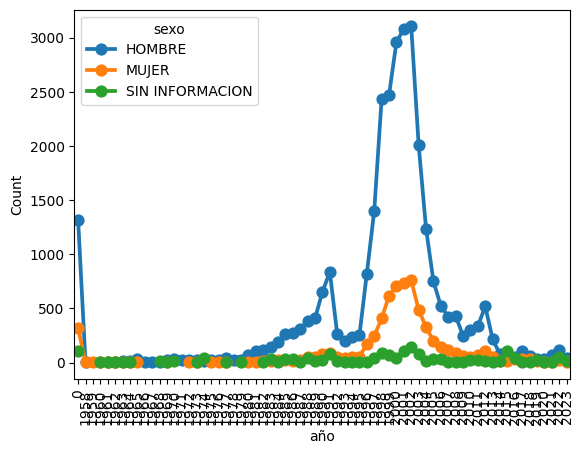

In [ ]:
frequency_data = victimas.groupby(['año','sexo']).size().reset_index(name='Count')

sns.pointplot(data=frequency_data, x='año', y='Count', hue='sexo')
plt.xticks(rotation = 'vertical')

plt.show()

ocupación
TRABAJADOR(A) SEXUAL                       2
MIEMBRO DE GRUPO POSDESMOVILIZACIÓN        5
DELINCUENTE                                5
PENSIONADO                                 5
DESEMPLEADO                                6
RASPACHÍN                                  6
GUERRILLERO                                9
NO APLICA                                 28
SEGURIDAD PRIVADA                         37
ECONOMÍA INFORMAL                         45
ADMINISTRADOR DE FINCA                    51
TRABAJO SIN ESPECIFICAR                   62
MINERO                                    67
PESCADOR                                  68
RELIGIOSO                                107
TRABAJADOR DE FINCA                      112
EMPRESARIO - INDUSTRIAL                  129
OBRERO                                   258
AMA DE CASA                              262
PERSONAL DE SALUD                        367
OTRA ¿CUÁL?                              438
ESTUDIANTE                               468


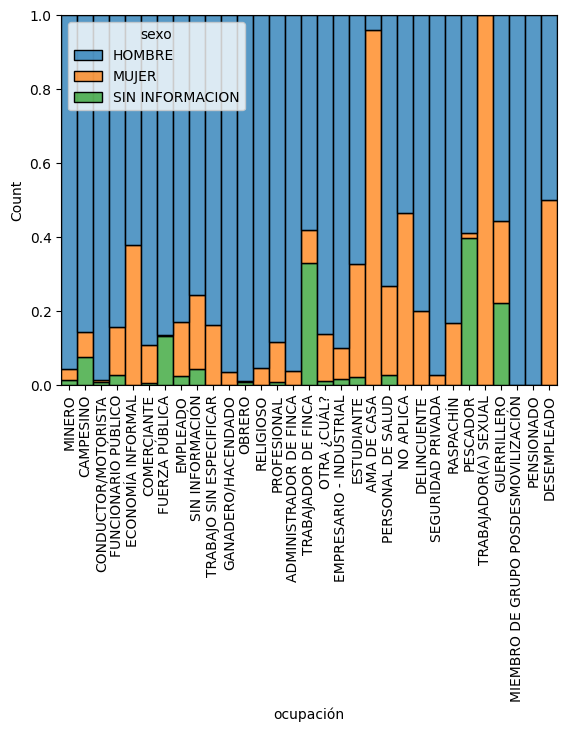

In [ ]:
#Ocupación y sexo

sns.histplot(victimas,
             x = victimas.ocupación,
             hue = victimas.sexo,
             multiple = 'fill')
plt.xticks(rotation = 'vertical')
victimas.ocupación.value_counts().sort_values()


In [ ]:
#ocupacion y año

sns.scatterplot(victimas,
              x = victimas.ocupación,
              y = victimas.año,
              color='purple')
plt.xticks(rotation = 'vertical')

victimas.año.value_counts().sort_values()
#Las personas que son parte de la economía informal han sido secuetrados constantemente
#Al rededor del año 2000 se presentaron secuestros en todas las ocupaciones

In [ ]:
victimas

,municipio,departamento,año,mes,día,sexo,ocupación,calidad_de_la_víctima_o_la_baja,situación_actual_de_la_víctima,tipo_de_liberación,no_de_veces_secuestrado,edad
0,QUIBDO,CHOCO,2005,8,2,HOMBRE,MINERO,CIVIL,MUERTO EN CAUTIVERIO,NaN,1,ADULTEZ (29-59 AÑOS)
1,ISNOS,HUILA,2014,7,13,HOMBRE,CAMPESINO,CIVIL,MUERTO EN CAUTIVERIO,NaN,1,ADULTEZ (29-59 AÑOS)
2,SAN AGUSTIN,HUILA,2006,12,21,HOMBRE,CONDUCTOR/MOTORISTA,CIVIL,MUERTO EN CAUTIVERIO,PAGO,2,NaN
3,RIOHACHA,LA GUAJIRA,1975,6,19,HOMBRE,FUNCIONARIO PÚBLICO,CIVIL,MUERTO EN CAUTIVERIO,NaN,0,NaN
4,SITIONUEVO,MAGDALENA,2005,9,26,HOMBRE,ECONOMÍA INFORMAL,CIVIL,MUERTO EN CAUTIVERIO,ND,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
38280,AGUACHICA,CESAR,2003,3,27,HOMBRE,COMERCIANTE,CIVIL,MUERTO EN CAUTIVERIO,NaN,1,ADULTEZ (29-59 AÑOS)
38281,AGUACHICA,CESAR,2003,3,27,HOMBRE,OTRA ¿CUÁL?,CIVIL,LIBERADO,FUGA,1,NaN
38282,GAMARRA,CESAR,1982,8,9,HOMBRE,GANADERO/HACENDADO,CIVIL,MUERTO EN CAUTIVERIO,NaN,1,NaN
38283,GAMARRA,CESAR,1982,8,9,HOMBRE,GANADERO/HACENDADO,CIVIL,MUERTO EN CAUTIVERIO,NaN,1,NaN


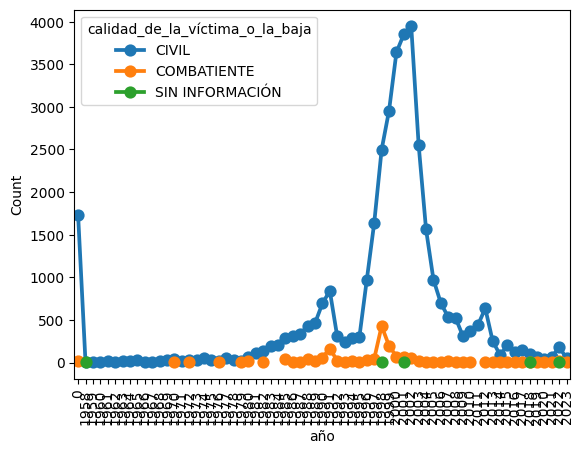

In [ ]:
frequency_data = victimas.groupby(['año','calidad_de_la_víctima_o_la_baja']).size().reset_index(name='Count')

sns.pointplot(data=frequency_data, x='año', y='Count', hue='calidad_de_la_víctima_o_la_baja')
plt.xticks(rotation = 'vertical')

plt.show()

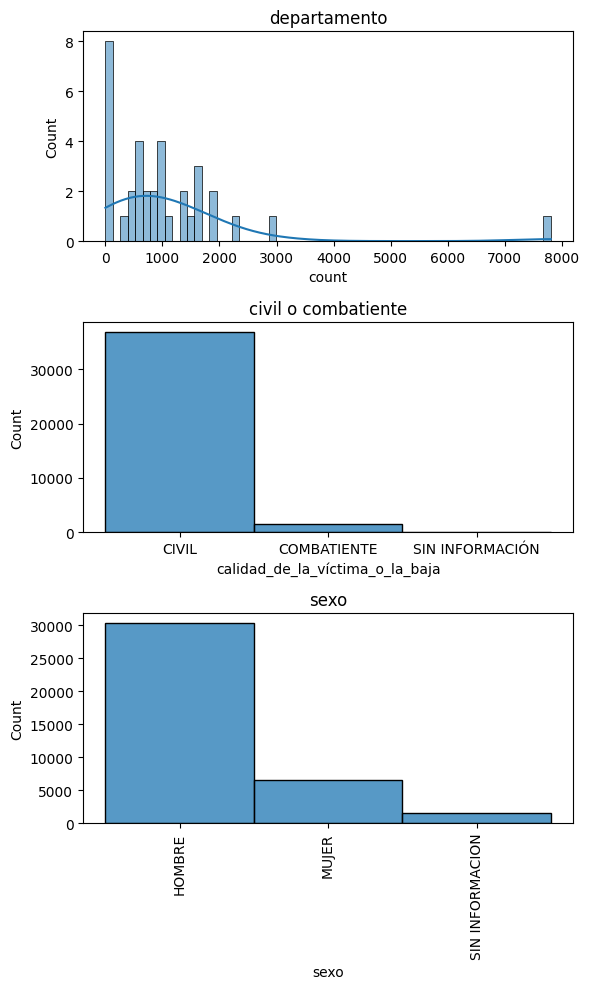

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

sns.histplot(datos.departamento.value_counts().sort_values(ascending=True), bins=60, kde=True, ax=axes[0])
axes[0].set_title('departamento')
plt.xticks(rotation = 'vertical')

sns.histplot(datos.calidad_de_la_víctima_o_la_baja, ax=axes[1])
axes[1].set_title('civil o combatiente')
plt.xticks(rotation = 'vertical')

sns.histplot(datos.sexo, ax=axes[2])
axes[2].set_title('sexo')
plt.xticks(rotation = 'vertical')

plt.tight_layout()
plt.show()